In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Vasan/OneDrive/Desktop/Sales Data.csv")

In [3]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [4]:
df["Product"].value_counts()

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [5]:
df.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df["Order Date"].unique()

array(['2019-12-30 00:01:00', '2019-12-29 07:03:00',
       '2019-12-12 18:21:00', ..., '2019-06-09 22:07:00',
       '2019-06-26 18:35:00', '2019-06-25 14:33:00'], dtype=object)

In [8]:
format_c = all(df["Order Date"].notnull())
format_c

True

In [9]:
for column in df.columns :
    print(f"Column : {column}, Data Type : {df[column].dtype}, format_c{all(df[column].notnull())}")

Column : Unnamed: 0, Data Type : int64, format_cTrue
Column : Order ID, Data Type : int64, format_cTrue
Column : Product, Data Type : object, format_cTrue
Column : Quantity Ordered, Data Type : int64, format_cTrue
Column : Price Each, Data Type : float64, format_cTrue
Column : Order Date, Data Type : object, format_cTrue
Column : Purchase Address, Data Type : object, format_cTrue
Column : Month, Data Type : int64, format_cTrue
Column : Sales, Data Type : float64, format_cTrue
Column : City, Data Type : object, format_cTrue
Column : Hour, Data Type : int64, format_cTrue


In [10]:
df["Order Date"].head()

0    2019-12-30 00:01:00
1    2019-12-29 07:03:00
2    2019-12-12 18:21:00
3    2019-12-22 15:13:00
4    2019-12-18 12:38:00
Name: Order Date, dtype: object

In [11]:
Sales_M = df.groupby("Month")["Sales"].sum().reset_index()

In [12]:
Sales_M

,Month,Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


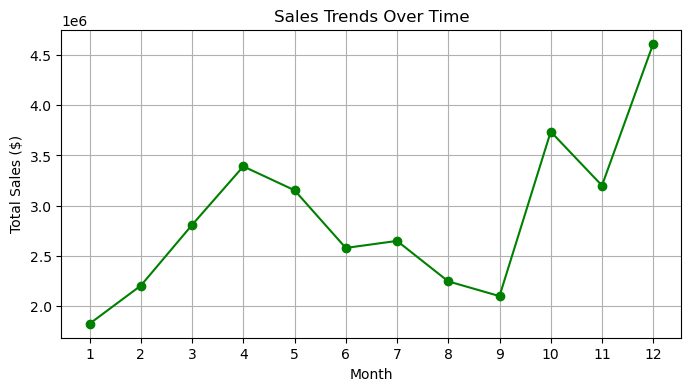

In [13]:
plt.figure(figsize = (8, 4))
plt.plot(Sales_M["Month"], Sales_M["Sales"], marker = "o", linestyle = "-", color = "g")
plt.title("Sales Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

In [14]:
Top_Product_S = df.groupby("Product")["Quantity Ordered"].sum().reset_index()
Top_Product_S.head()

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635


In [15]:
Top_Product_S = Top_Product_S.head(10)
Top_Product_S

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


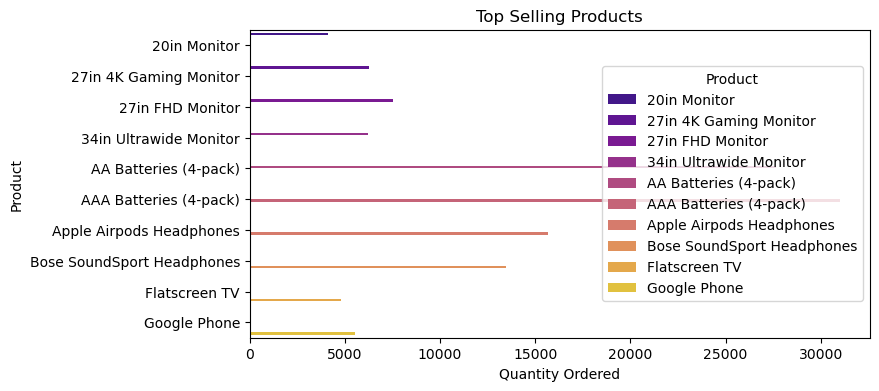

In [16]:
plt.figure(figsize = (8, 4))
sns.barplot(x="Quantity Ordered", y = "Product", hue = "Product", data = Top_Product_S, palette = "plasma")
plt.title("Top Selling Products")
plt.xlabel("Quantity Ordered")
plt.ylabel("Product")
plt.show()


In [17]:
Total_S_City = df.groupby("City")["Sales"].sum().reset_index()
Total_S_City.head(10)

,City,Sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


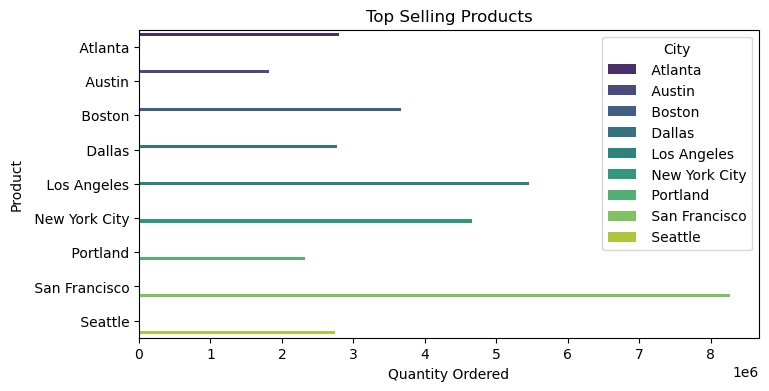

In [18]:
plt.figure(figsize = (8, 4))
sns.barplot(x="Sales", y = "City", hue = "City", data = Total_S_City, palette = "viridis")
plt.title("Top Selling Products")
plt.xlabel("Quantity Ordered")
plt.ylabel("Product")
plt.show()

In [19]:
Total_S_hour = df.groupby("Hour")["Sales"].sum().reset_index()
Total_S_hour.head()

,Hour,Sales
0,0,713721.27
1,1,460866.88
2,2,234851.44
3,3,145757.89
4,4,162661.01


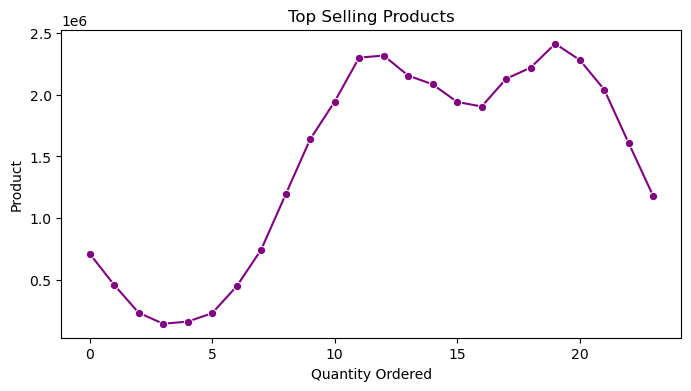

In [20]:
plt.figure(figsize = (8, 4))
sns.lineplot(x="Hour", y = "Sales",data = Total_S_hour, marker = "o", color = "Purple")
plt.title("Top Selling Products")
plt.xlabel("Quantity Ordered")
plt.ylabel("Product")
plt.show()

In [21]:
Peak_hour = Total_S_hour[Total_S_hour["Sales"] == Total_S_hour["Sales"].max()] 
print(f"Peak Hours for Sales : {list(Peak_hour['Hour'])}")

Peak Hours for Sales : [19]
